In [1]:
library(tidyverse) # metapackage of all tidyverse packages
list.files(path = "../input")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "supermarket-sales"

In [2]:
sales <- read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")

Rows: 1000 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Invoice ID, Branch, City, Customer type, Gender, Product line, Dat...
dbl  (8): Unit price, Quantity, Tax 5%, Total, cogs, gross margin percentage...
time (1): Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(sales)

Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30:00,Ewallet,597.73,4.761905,29.8865,4.1


### What gender our customers are?

In [4]:
sales %>%
    group_by(Gender) %>%
    summarize(Count = n())

Gender,Count
<chr>,<int>
Female,501
Male,499


### Which gender spends more on which product lines?

In [5]:
sales %>%
    group_by(Gender) %>%
    summarize(Mean = mean(Total))

Gender,Mean
<chr>,<dbl>
Female,335.0957
Male,310.7892


### Which Product Lines are popular between genders?

Warning message in geom_histogram(position = "dodge", stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


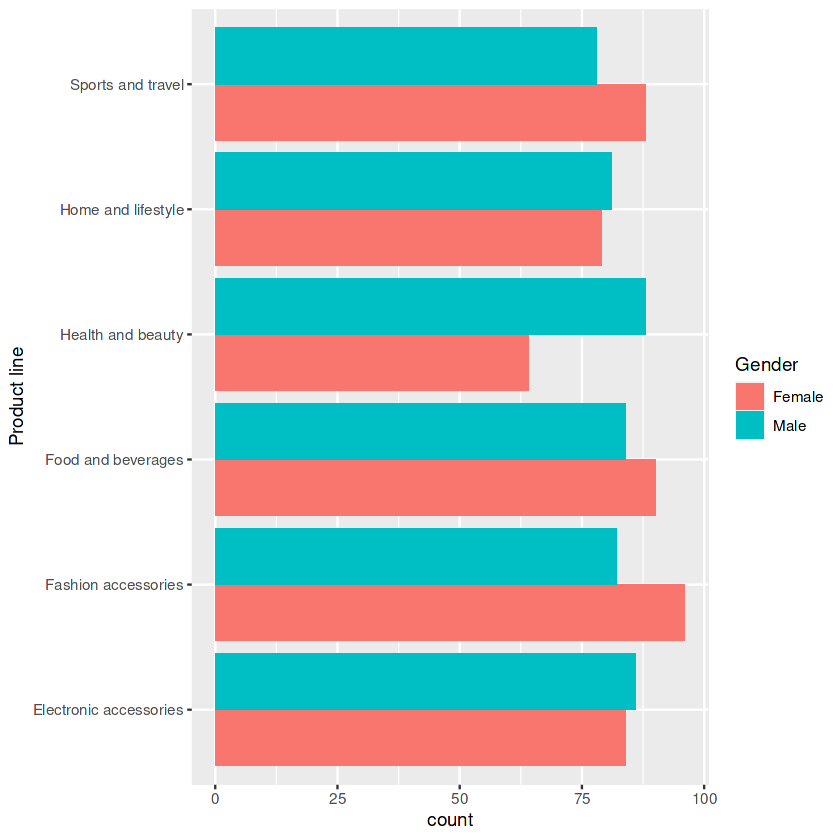

In [6]:
ggplot(sales, mapping = aes(x = `Product line`, fill=Gender)) +
    geom_histogram(position="dodge", stat="count") +
    coord_flip()

`summarise()` has grouped output by 'Product line'. You can override using the
`.groups` argument.


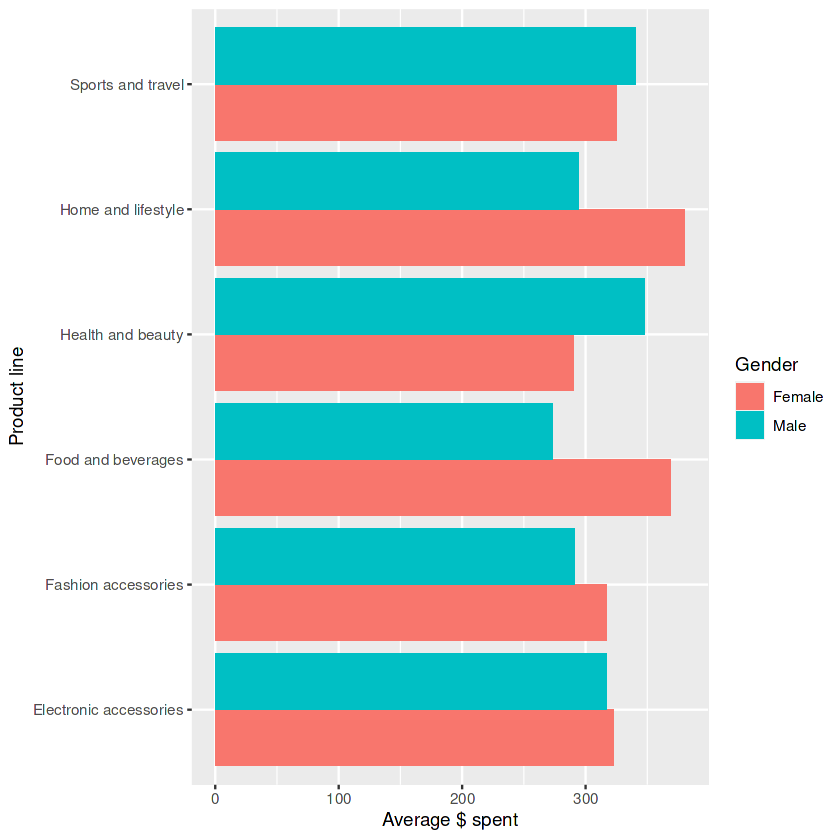

In [7]:
sales %>%
    group_by(`Product line`, Gender) %>%
    summarize(Mean = mean(Total)) %>%
    ggplot(mapping = aes(x = `Product line`, y = Mean, fill = Gender)) +
        geom_col(position = "dodge") +
        coord_flip() +
        ylab("Average $ spent")

### Which product line generates the most revenue?

In [8]:
sales %>%
    group_by(`Product line`) %>%
    summarize(Mean = mean(Total))

Product line,Mean
<chr>,<dbl>
Electronic accessories,319.6325
Fashion accessories,305.0893
Food and beverages,322.6715
Health and beauty,323.6430
Home and lifestyle,336.6370
Sports and travel,332.0652


### Which store generates the most revenue?

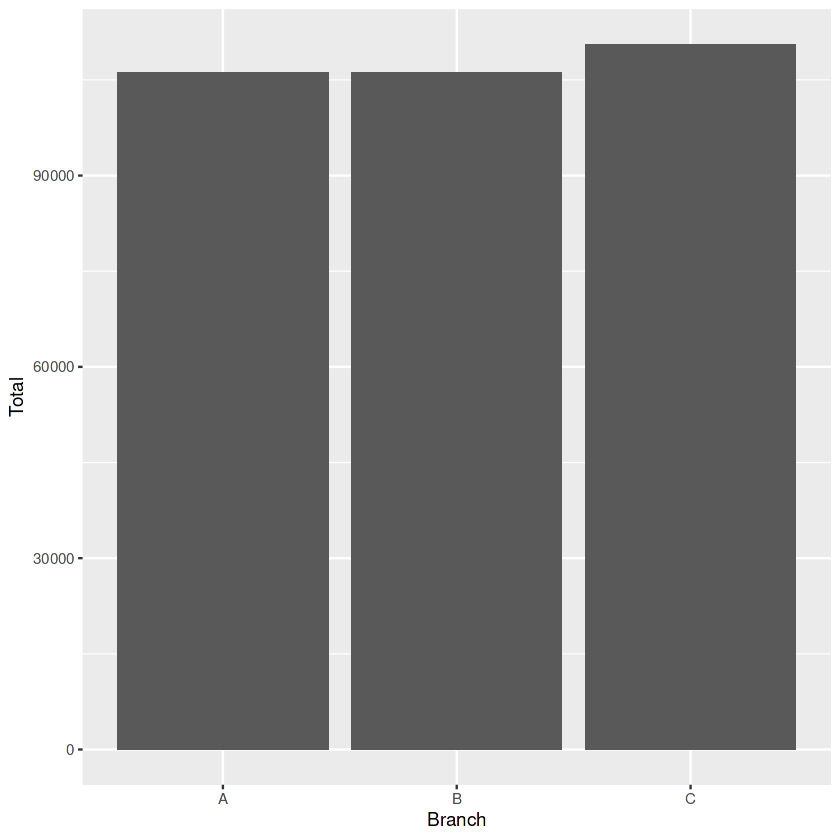

In [9]:
sales %>%
    group_by(Branch) %>%
    summarize(Total = sum(Total)) %>%
    ggplot(mapping = aes(x = Branch, y = Total)) +
        geom_col()

### Which payment method is the most popular?

In [10]:
sales %>%
    group_by(Payment) %>%
    summarize(Count = n())

Payment,Count
<chr>,<int>
Cash,344
Credit card,311
Ewallet,345


### How much of our customers are members?

In [11]:
sales %>%
    group_by(`Customer type`) %>%
    summarize(Count = n())

Customer type,Count
<chr>,<int>
Member,501
Normal,499


### Do members spend more?

In [12]:
sales %>%
    group_by(`Customer type`) %>%
    summarize(Mean = mean(Total))

Customer type,Mean
<chr>,<dbl>
Member,327.7913
Normal,318.1229


### Daily revenue plot

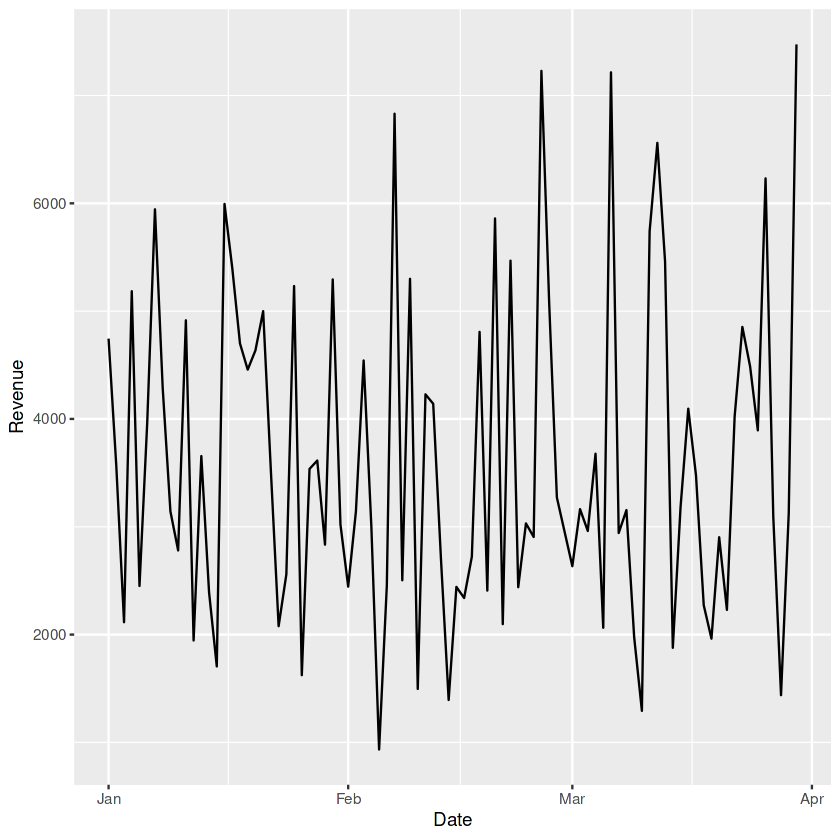

In [20]:
daily_revenue <- sales %>%
    group_by(Date) %>%
    summarize(Revenue = sum(Total))

daily_revenue$Date <- as.Date(daily_revenue$Date, "%m/%d/%y")

daily_revenue$Date <- sort(daily_revenue$Date)

ggplot(daily_revenue, mapping = aes(x = Date, y = Revenue)) +
    geom_line()

In [28]:
df <- data.frame(
    "ds" = daily_revenue$Date,
    "y" = daily_revenue$Revenue
)

Disabling yearly seasonality. Run prophet with yearly.seasonality=TRUE to override this.

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



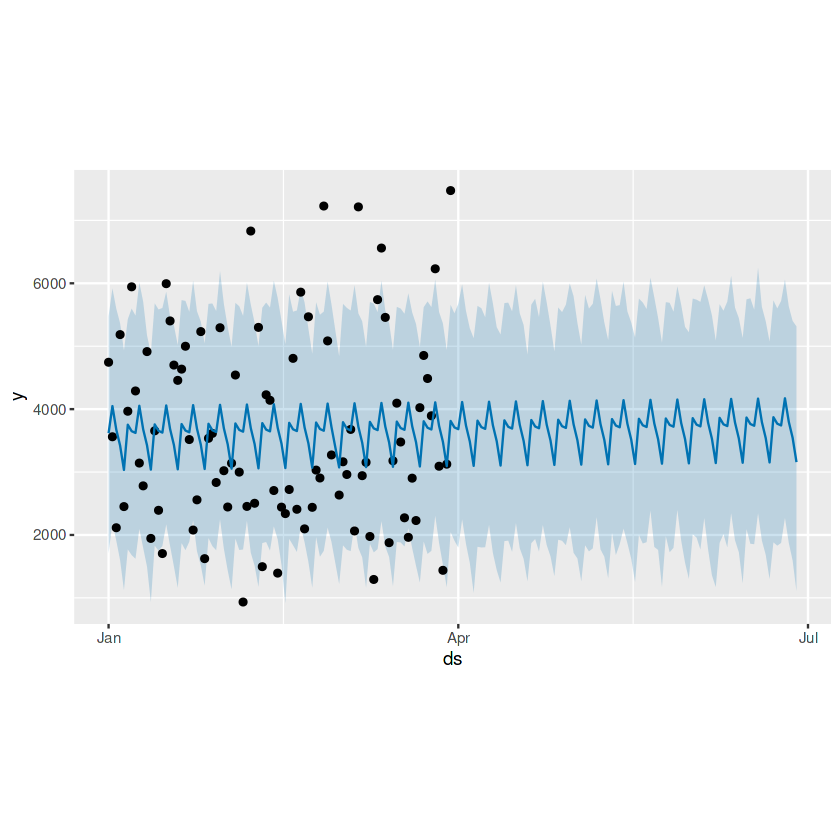

In [33]:
library(prophet)

m <- prophet(df, weekly.seasonality = T)
future <- make_future_dataframe(m, periods = 90)
forecast <- predict(m, future)
plot(m, forecast)